<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/04_2_Load_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data from local to Google Colab

In [ ]:
import numpy as np
import pandas as pd

구글 드라이브에서 파일을 읽는 방법 1

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


일반적인 Colab Notebooks 경로

In [ ]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/

data_science  Keras	    Prof_Kim  Untitled0.ipynb
GH	      NLP	    Python    Untitled1.ipynb
HeoMinSeok    official_tf2  Pytorch


In [ ]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv

'/gdrive/My Drive/Colab Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv'


path = '/gdrive/My Drive/Colab Notebooks/data/accidents.txt'
dataset = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [ ]:
dataset = np.loadtxt('/gdrive/My Drive/Colab Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv', delimiter=',', dtype=np.float32)
# dataset = pd.read_csv('/gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv', delimiter='\t')
dataset

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]], dtype=float32)

구글 드라이브에서 파일을 읽는 방법 2

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
!ls

In [ ]:
import io

# pd.read_csv로 csv파일 불러오기
# io.BytesIO로 묶어서 불러와야함함
dataset = pd.read_csv(io.BytesIO(uploaded['01_test_score.csv']), names=["과목1", "과목2", "과목3", "총합"])
# dataset = pd.read_csv(io.BytesIO(uploaded['01_test_score.csv']), header=None)
dataset.head()

In [ ]:
# pandas dataframe을 numpy format으로 변경
dataset_np = dataset.to_numpy()
print(type(dataset_np))
print(dataset_np.shape)
print(dataset_np[0:5])

AttributeError: ignored

# Loading Data from .csv file

In [ ]:
x_data = dataset[:, 0:-1]
y_data = dataset[:, [-1]]

In [ ]:
x_data = dataset_np[:, 0:-1]
y_data = dataset_np[:, [-1]]

In [ ]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data 길이
print(x_data[:5])   # 첫 다섯 개

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [ ]:
print(y_data.shape) # y_data shape
print(len(y_data))  # y_data 길이
print(y_data[:5])   # 첫 다섯 개

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


In [ ]:
# pytorch must need batchsize
bad_y_data = y_data.reshape(-1)
print(bad_y_data.shape)
print(bad_y_data[:5])   # 첫 다섯 개

(25,)
[152. 185. 180. 196. 142.]


# Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# For reproducibility
torch.manual_seed(1)

**with nn.Module**

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
bad_y_train = torch.FloatTensor(bad_y_data)

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, prediction.squeeze().detach(), cost.item()
        ))

Epoch    0/1000 hypothesis: tensor([11.3255, 11.7617, 12.4897, 13.7879,  8.4404,  6.4585, 11.2443,  9.6431,
        10.8762, 10.4320, 10.0927,  9.2599, 12.6315, 10.1290, 11.0539, 12.3042,
         8.8465, 13.9668, 12.2982, 11.2770, 12.7855, 11.3878, 12.2952, 10.8272,
        12.3484]) Cost: 23265.921875
Epoch  100/1000 hypothesis: tensor([154.6288, 184.1238, 182.2529, 198.7181, 139.8882, 103.4539, 149.7031,
        112.3294, 172.0450, 159.8245, 143.4814, 140.8563, 187.9762, 155.8355,
        150.1729, 187.2427, 147.5966, 180.1307, 179.4379, 160.8219, 175.1524,
        173.1226, 167.0757, 155.2081, 190.9409]) Cost: 10.228635
Epoch  200/1000 hypothesis: tensor([154.5512, 184.1492, 182.2132, 198.7184, 139.9013, 103.5444, 149.7346,
        112.3929, 172.1494, 160.0277, 143.5025, 140.9461, 187.8929, 155.7121,
        150.2270, 187.2990, 147.4632, 180.1684, 179.3333, 160.7233, 175.1909,
        173.1813, 167.0900, 155.0307, 190.9282]) Cost: 9.888563
Epoch  300/1000 hypothesis: tensor([154.47

**mini_batch_train**

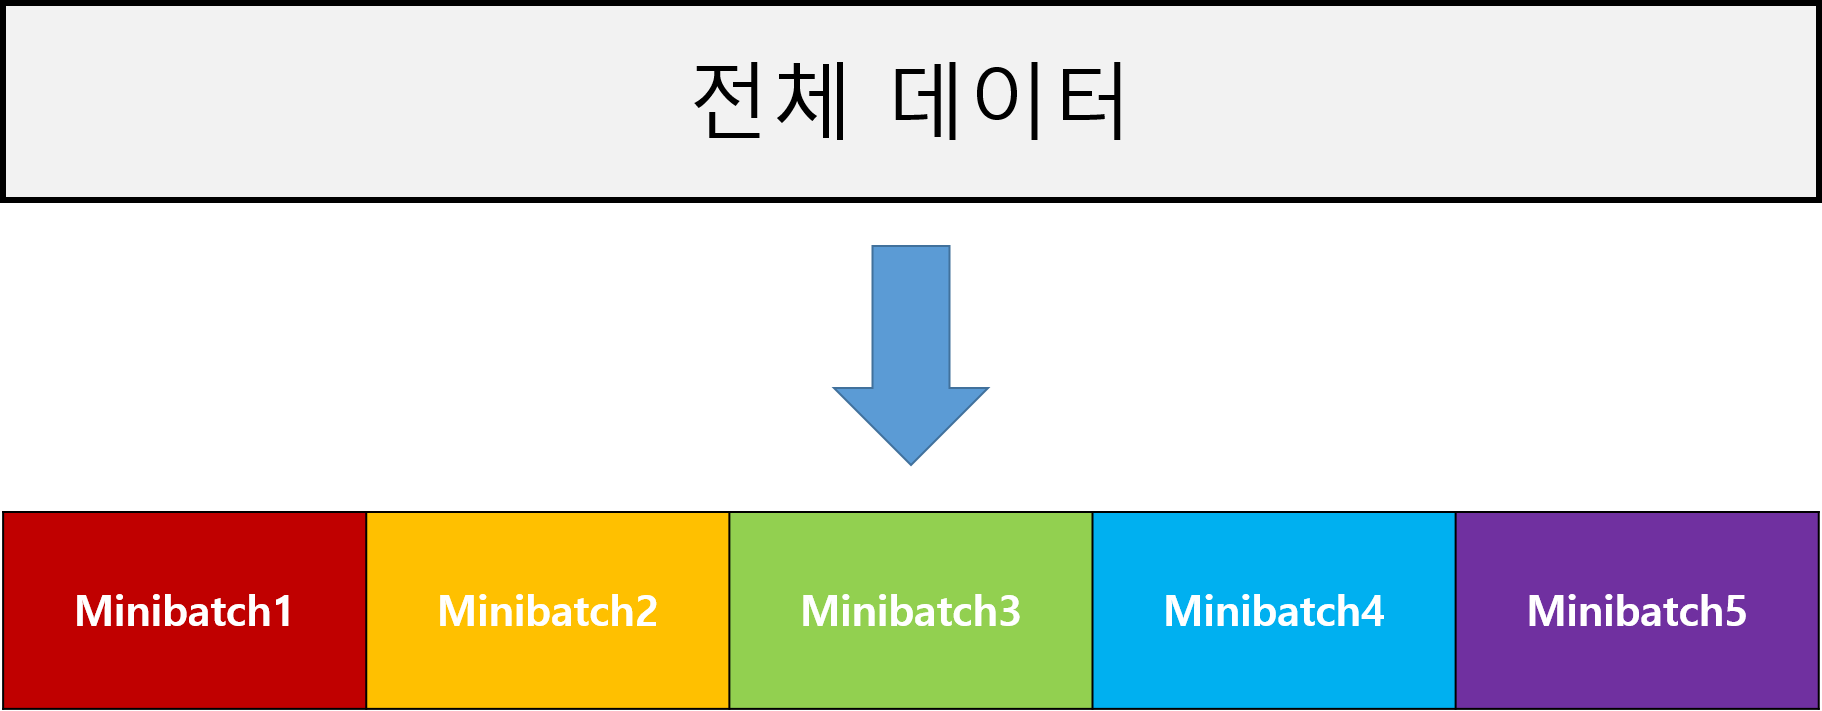

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CustomDataset(Dataset):
# torch.utils.data.Dataset 상속
    def __init__(self, x_data, y_data):
        self.x_train = x_data
        self.y_train = y_data

    def __len__(self):
    # 이 데이터셋의 총 데이터 수
        return len(self.x_train)

    def __getitem__(self, idx):
    # 어떠한 인덱스(idx)를 받았을 때, 그에 상응하는 입출력 데이터 반환
        x = torch.FloatTensor(self.x_train[idx])
        y = torch.FloatTensor(self.y_train[idx])
        return x, y

In [ ]:
dataset = CustomDataset(x_data, y_data)

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True,)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/13 Cost: 11063.976562
Epoch    0/20 Batch 2/13 Cost: 2873.776855
Epoch    0/20 Batch 3/13 Cost: 2313.082764
Epoch    0/20 Batch 4/13 Cost: 615.348328
Epoch    0/20 Batch 5/13 Cost: 95.979713
Epoch    0/20 Batch 6/13 Cost: 69.386299
Epoch    0/20 Batch 7/13 Cost: 2.482364
Epoch    0/20 Batch 8/13 Cost: 30.791615
Epoch    0/20 Batch 9/13 Cost: 2.332696
Epoch    0/20 Batch 10/13 Cost: 6.076922
Epoch    0/20 Batch 11/13 Cost: 34.143494
Epoch    0/20 Batch 12/13 Cost: 0.019993
Epoch    0/20 Batch 13/13 Cost: 54.270058
Epoch    1/20 Batch 1/13 Cost: 9.817627
Epoch    1/20 Batch 2/13 Cost: 32.722340
Epoch    1/20 Batch 3/13 Cost: 16.071671
Epoch    1/20 Batch 4/13 Cost: 10.830376
Epoch    1/20 Batch 5/13 Cost: 3.923363
Epoch    1/20 Batch 6/13 Cost: 50.978374
Epoch    1/20 Batch 7/13 Cost: 2.371330
Epoch    1/20 Batch 8/13 Cost: 22.467712
Epoch    1/20 Batch 9/13 Cost: 1.603945
Epoch    1/20 Batch 10/13 Cost: 8.667933
Epoch    1/20 Batch 11/13 Cost: 29.927698
Epoch    1/